# TASK - 4

## Exploratory Data Analysis

### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)

### Importing Data

In [3]:
data=pd.read_csv('C:/Users/Shrut-Shah/Downloads/SampleSuperstore.csv')
print(data.shape)

(9994, 13)


### Checking columns,data types and missing values 

In [4]:
print(data.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [5]:
print(data.dtypes)

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [6]:
print(data.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [7]:
print(data.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [8]:
print(data.nunique())

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64


In [9]:
print(data[['City','State','Category','Postal Code','Sales','Quantity','Discount','Profit']].head())

              City       State         Category  Postal Code     Sales  Quantity  Discount    Profit
0        Henderson    Kentucky        Furniture        42420  261.9600         2      0.00   41.9136
1        Henderson    Kentucky        Furniture        42420  731.9400         3      0.00  219.5820
2      Los Angeles  California  Office Supplies        90036   14.6200         2      0.00    6.8714
3  Fort Lauderdale     Florida        Furniture        33311  957.5775         5      0.45 -383.0310
4  Fort Lauderdale     Florida  Office Supplies        33311   22.3680         2      0.20    2.5164


In [10]:
print('Net profit: ',data['Profit'].values.sum())

Net profit:  286397.0217


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


### Correlation between Sales,Quantity,Discount,Profit

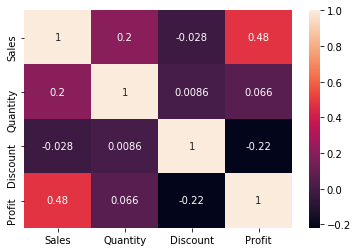

In [12]:
corelation=data[['Sales','Quantity','Discount','Profit']].corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B28617448>,
      dtype=object)

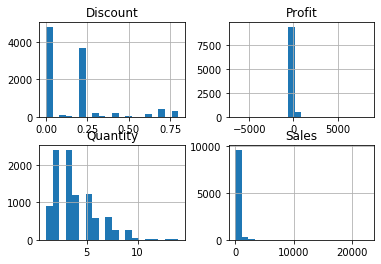

In [13]:
df=data[['Profit','Sales','Discount','Quantity']]
df.hist(bins=20)

### Graph of Sales,Profit and Discount

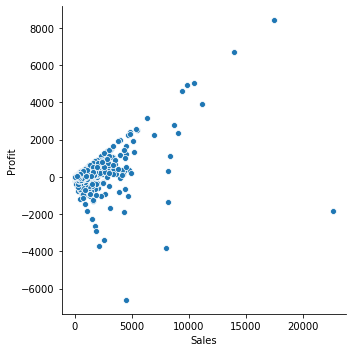

In [14]:
sns.relplot(x='Sales',y='Profit',data=data)

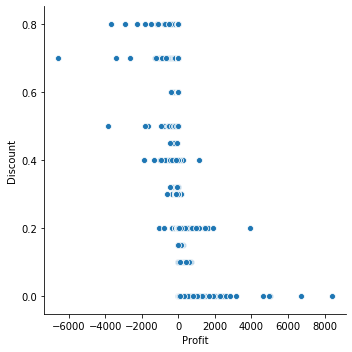

In [15]:
sns.relplot(x='Profit',y='Discount',data=data)

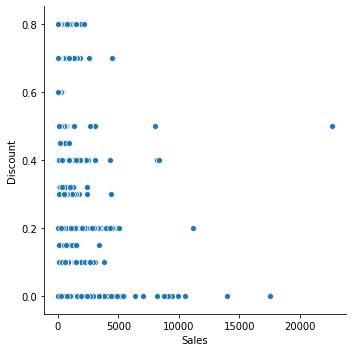

In [16]:
sns.relplot(x='Sales',y='Discount',data=data)

### Bar Graph of State vs Profit

States where there is NO profit are: 
  ['Arizona', 'Colorado', 'Florida', 'Illinois', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Tennessee', 'Texas']


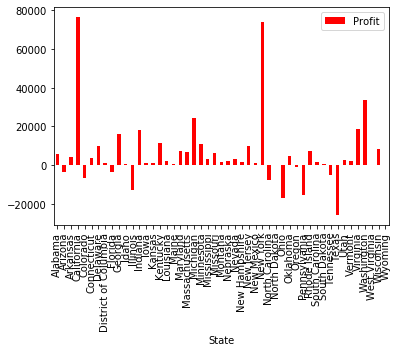

In [45]:
df=data[['State','Profit']]
df=df.set_index('State')
df=df.groupby(level=0).sum()
df=df.reset_index()
df.plot.bar(x='State',y='Profit',color='red',width=0.5)
xc=df[df['Profit']<0]
print('States where there is NO profit are: \n ',list(xc['State']))

### Bar Graph of State vs Sales

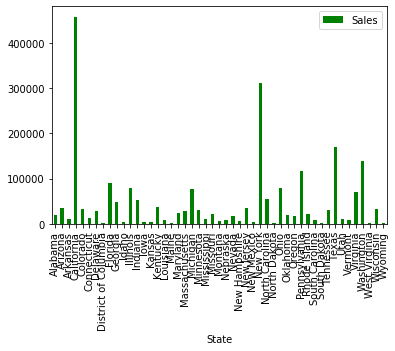

In [18]:
df=data[['State','Sales']]
df=df.set_index('State')
df=df.groupby(level=0).sum()
df=df.reset_index()
df.plot.bar(x='State',y='Sales',color='green')

### Pie chart : Category vs Profit and Sales

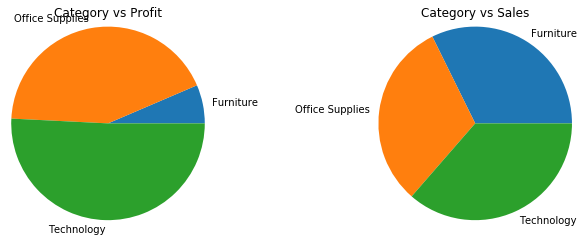

In [48]:
df=data[['Category','Profit','Sales']]
df=df.set_index('Category')
df=df.groupby(level=0).sum()
prof=list(df['Profit'])
sale=list(df['Sales'])
ind=df.index.values.tolist()

fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, 0.7], aspect=1)
ax1.pie(prof, labels=ind, radius = 1.2)
ax2 = fig.add_axes([.7, .0, .8, .7], aspect=1)
ax2.pie(sale, labels=ind, radius = 1.2)
ax1.set_title('Category vs Profit')
ax2.set_title('Category vs Sales')
plt.show()


### Bar graph of Region vs Sales,Profit

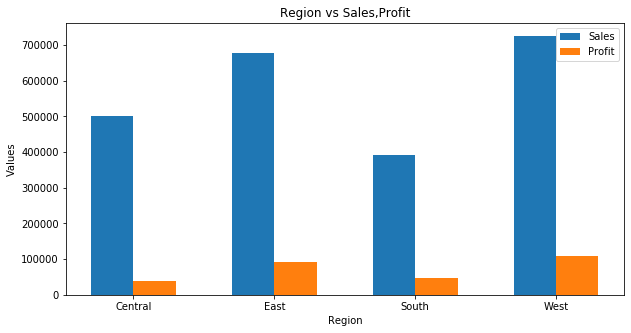

Highest amount of Sales and Profit is in West Region.
South Region has more profit than Central region despite of having less Sales compared to central.


In [50]:
df=data[['Region','Sales','Profit']]
df=df.set_index('Region')
df=df.groupby(level=0).sum()
names = list(df.index.values)
df=df.reset_index()
sal=tuple(df['Sales'])
prof=tuple(df['Profit'])
N = len(names)
ind = np.arange(N)

plt.figure(figsize=(10,5))

width = 0.3       

plt.bar(ind, sal , width, label='Sales')
plt.bar(ind + width, prof, width, label='Profit')
plt.xlabel("Region")
plt.ylabel('Values')
plt.title('Region vs Sales,Profit')

plt.xticks(ind + width / 2, names)

plt.legend(loc='best')
plt.show()

print("Highest amount of Sales and Profit is in West Region.")
print('South Region has more profit than Central region despite of having less Sales compared to central.')

### Bar graph of Ship Mode vs Sales

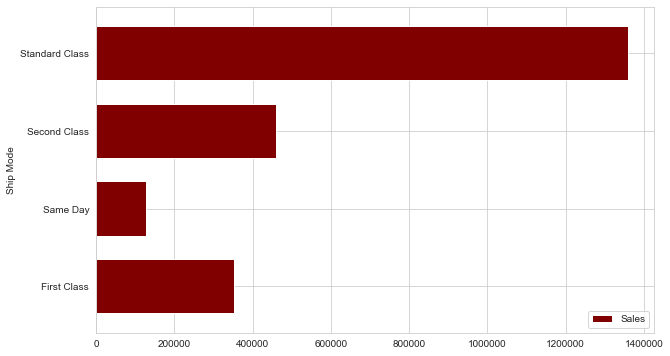

In [330]:
df=data[['Ship Mode','Sales']]
df=df.set_index('Ship Mode')
df=df.groupby(level=0).sum()
df=df.reset_index()
df.plot.barh(x='Ship Mode',y='Sales',color='maroon',width=0.7)


### Pie chart of Ship Mode vs Profit

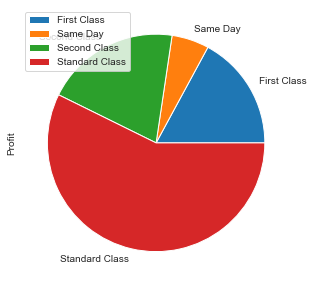

In [331]:
# Ship mode vs Profit


df=data[['Ship Mode','Profit']]
df=df.set_index('Ship Mode')
df=df.groupby(level=0).sum()
df.plot.pie(y='Profit',figsize=(5,5))